In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# Gate Definitions
X = np.array([[0, 1], [1, 0]])
H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
I = np.eye(2)
CNOT = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]])

In [3]:
import pennylane as qml
import pennylane.numpy as np

In [4]:
def apply_quantum(qubits):
    dev = qml.device("default.qubit", wires=qubits)

    @qml.qnode(dev)
    def circuit(qubits):
        for wire in range(qubits-1):
            qml.QubitUnitary(X, wires=wire)
            qml.QubitUnitary(H, wires=wire)
            qml.QubitUnitary(CNOT, wires=[wire,wire+1])
        qml.QubitUnitary(X, wires=qubits-1)
        qml.QubitUnitary(H, wires=qubits-1)
        return qml.state()
    
    state = circuit(qubits)
    return state

In [5]:
# Run Circuit with Matrix Multiplication
state = apply_quantum(4)
state

tensor([ 0.25+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j,  0.25+0.j,
        -0.25+0.j, -0.25+0.j, -0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,
        -0.25+0.j,  0.25+0.j, -0.25+0.j, -0.25+0.j], requires_grad=True)

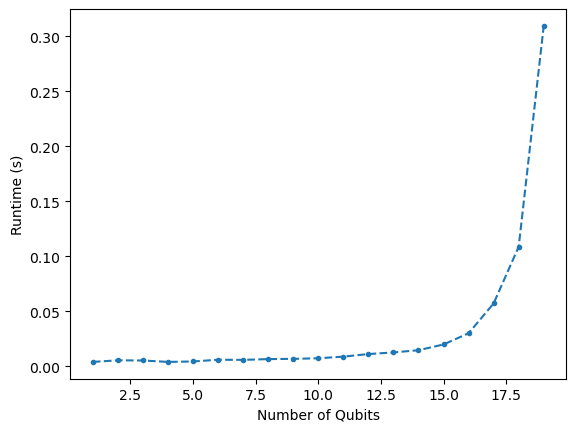

In [7]:
# Runtime Plot
qubits = range(1, 20)
times = []
states = []
for n in qubits:
    start = time.time()
    states.append(apply_quantum(n))
    times.append(time.time() - start)

plt.plot(qubits, times,marker = ".",ls = "--")
plt.xlabel('Number of Qubits')
plt.ylabel('Runtime (s)')
plt.show()